<a href="https://colab.research.google.com/github/lakki-tharun/car_buyers_classification/blob/master/edureka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This challenge i am done in 7 steps

Step-1   :   Importing modules[required for our problem]



Step-2   :   Importing Dataset[required for our problem]



Step-3   :   Data preprocessing[pre-processing the data]


Step-4   :   EDA[data wrangling]



Step-5   :   Data Modeling[applying required alogorithm]


Step-6   :   Model Evaluation[evaluate the model performance]


Step-7   :   Predictions[make predictions on required test_set]














In [ ]:
#STEP-1 : Importing modules



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2




In [ ]:
#STEP-2 : Importing datasets
#for importing datsets we will use pandas module



data_set = pd.read_csv("data.csv")
data_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 18 columns):
car_company          3390 non-null object
model_ID             3390 non-null object
mileage              3390 non-null int64
engine_power         3390 non-null int64
registration_date    3390 non-null object
fuel                 3390 non-null object
car_paint_color      3390 non-null object
car_type             3390 non-null object
feature1             3390 non-null bool
feature2             3390 non-null bool
feature3             3390 non-null bool
feature4             3390 non-null bool
feature5             3390 non-null bool
feature6             3390 non-null bool
feature7             3390 non-null bool
feature8             3390 non-null bool
sold_date            3390 non-null object
car_price            3390 non-null int64
dtypes: bool(8), int64(3), object(7)
memory usage: 291.4+ KB


In [ ]:
#STEP - 3 : Data Preprocessing
#finally we have 18 columns with 3 types of data-types and no-null values
#we have data in 3 types object,boolean,int64
#we need to convert all data into numeric type this is best for analyzing data
#before preprocessing first we need to know details abour dataset

data_set.head()


,car_company,model_ID,mileage,engine_power,registration_date,fuel,car_paint_color,car_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,sold_date,car_price
0,Edureka_motors,318 Gran Turismo,140245,105,01-10-2014,diesel,white,hatchback,False,True,False,False,True,True,True,True,01-03-2018,19200
1,Edureka_motors,218 Active Tourer,91512,100,01-06-2015,petrol,white,van,False,True,True,False,False,False,True,False,01-05-2018,14300
2,Edureka_motors,318,113744,100,01-06-2012,diesel,grey,sedan,True,True,False,False,False,False,True,False,01-06-2018,14300
3,Edureka_motors,320 Gran Turismo,195063,135,01-05-2014,diesel,black,hatchback,False,True,True,False,True,False,True,True,01-03-2018,16200
4,Edureka_motors,518,148943,100,01-11-2013,diesel,brown,estate,True,True,True,False,True,False,True,True,01-05-2018,17300


In [ ]:
#first we need to eliminate some columns from dataset because that columns doesn't show any impact on the dependent variable
#we have same value in all rows of car_comapny it doesn't show any impact on the dependent variable
#so we need to eliminate car_company colun from our dataset

data_set_preprocessed = data_set
data_set_preprocessed = data_set_preprocessed.drop(columns=['car_company'])

#model_id column also doesn't show any impact on the dependent variable
#so we need to eliminate car_company colun from our dataset

data_set_preprocessed = data_set_preprocessed.drop(columns=['model_ID'])

#now we need to convert boolean datatype columns into catrgeorical data-types(means convertong TRUE or FALSE to 0 or 1)
#totally we have 8 columns of boolean data from column feature1 to feature8

label_encoder = LabelEncoder()
data_set_preprocessed['feature1'] = label_encoder.fit_transform(data_set_preprocessed['feature1'] )
data_set_preprocessed['feature2'] = label_encoder.fit_transform(data_set_preprocessed['feature2'] )
data_set_preprocessed['feature3'] = label_encoder.fit_transform(data_set_preprocessed['feature3'] )
data_set_preprocessed['feature4'] = label_encoder.fit_transform(data_set_preprocessed['feature4'] )
data_set_preprocessed['feature5'] = label_encoder.fit_transform(data_set_preprocessed['feature5'] )
data_set_preprocessed['feature6'] = label_encoder.fit_transform(data_set_preprocessed['feature6'] )
data_set_preprocessed['feature7'] = label_encoder.fit_transform(data_set_preprocessed['feature7'] )
data_set_preprocessed['feature8'] = label_encoder.fit_transform(data_set_preprocessed['feature8'] )
data_set_preprocessed.head()

#now we have a two date columns registrartion_date and sold_date we need to time gap between these two dates
#these time gap plays a major role in detemining the dependent variable

#extracting month 
data_set_preprocessed["Month"] = pd.to_datetime(data_set_preprocessed["registration_date"]).dt.month

data_set_preprocessed["Month_2"] = pd.to_datetime(data_set_preprocessed["sold_date"]).dt.month

#extracting year
data_set_preprocessed["year"] = pd.to_datetime(data_set_preprocessed["registration_date"]).dt.year

data_set_preprocessed['year_2'] = pd.to_datetime(data_set_preprocessed["sold_date"]).dt.year

#extracting day
for i in range(len(data_set_preprocessed)): 
  data_set_preprocessed.loc[i,'day'] = int(data_set_preprocessed.loc[i,'registration_date'].split('-')[1])

for i in range(len(data_set_preprocessed)): 
   data_set_preprocessed.loc[i,'day_2'] = int(data_set_preprocessed.loc[i,'sold_date'].split('-')[1])

    
values_day = data_set_preprocessed['day'].values
values_day_2 = data_set_preprocessed['day_2'].values


values_year = data_set_preprocessed['year'].values
values_year_2 = data_set_preprocessed['year_2'].values

data_set_preprocessed['diffrence_in _days'] = (values_year_2 - values_year) * 365 + abs(values_day - values_day_2)
#here we are not added any month column data because month columns contains same value


data_set_preprocessed.head()










,mileage,engine_power,registration_date,fuel,car_paint_color,car_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,sold_date,car_price,Month,Month_2,year,year_2,day,day_2,diffrence_in _days
0,140245,105,01-10-2014,diesel,white,hatchback,0,1,0,0,1,1,1,1,01-03-2018,19200,1,1,2014,2018,10.0,3.0,1467.0
1,91512,100,01-06-2015,petrol,white,van,0,1,1,0,0,0,1,0,01-05-2018,14300,1,1,2015,2018,6.0,5.0,1096.0
2,113744,100,01-06-2012,diesel,grey,sedan,1,1,0,0,0,0,1,0,01-06-2018,14300,1,1,2012,2018,6.0,6.0,2190.0
3,195063,135,01-05-2014,diesel,black,hatchback,0,1,1,0,1,0,1,1,01-03-2018,16200,1,1,2014,2018,5.0,3.0,1462.0
4,148943,100,01-11-2013,diesel,brown,estate,1,1,1,0,1,0,1,1,01-05-2018,17300,1,1,2013,2018,11.0,5.0,1831.0


In [ ]:
#by seeing the preprocessed dataset we need to eliminate some columns
#we have differnce_in_days column so we don't need any date contained columns 


data_set_preprocessed = data_set_preprocessed.drop(columns=['Month','Month_2','year','year_2','day','day_2','sold_date','registration_date'])
data_set_preprocessed.head()




,mileage,engine_power,fuel,car_paint_color,car_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,car_price,diffrence_in _days
0,140245,105,diesel,white,hatchback,0,1,0,0,1,1,1,1,19200,1467.0
1,91512,100,petrol,white,van,0,1,1,0,0,0,1,0,14300,1096.0
2,113744,100,diesel,grey,sedan,1,1,0,0,0,0,1,0,14300,2190.0
3,195063,135,diesel,black,hatchback,0,1,1,0,1,0,1,1,16200,1462.0
4,148943,100,diesel,brown,estate,1,1,1,0,1,0,1,1,17300,1831.0


In [ ]:
#now we need to encode some colums fuel,car_paint,car_type


data_set_preprocessed['fuel'] = label_encoder.fit_transform(data_set_preprocessed['fuel'] )
data_set_preprocessed['car_paint_color'] = label_encoder.fit_transform(data_set_preprocessed['car_paint_color'] )
data_set_preprocessed['car_type'] = label_encoder.fit_transform(data_set_preprocessed['car_type'] )
data_set_preprocessed.head()





,mileage,engine_power,fuel,car_paint_color,car_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,car_price,diffrence_in _days
0,140245,105,0,9,3,0,1,0,0,1,1,1,1,19200,1467.0
1,91512,100,3,9,7,0,1,1,0,0,0,1,0,14300,1096.0
2,113744,100,0,5,4,1,1,0,0,0,0,1,0,14300,2190.0
3,195063,135,0,1,3,0,1,1,0,1,0,1,1,16200,1462.0
4,148943,100,0,3,2,1,1,1,0,1,0,1,1,17300,1831.0


In [ ]:
#again we need to perform one hot encoding on these coloumns


data_set_preprocessed  =  pd.get_dummies(data_set_preprocessed,columns = ['fuel'])
data_set_preprocessed  =  pd.get_dummies(data_set_preprocessed,columns = ['car_paint_color'])
data_set_preprocessed  =  pd.get_dummies(data_set_preprocessed,columns= ['car_type'])
data_set_preprocessed.head()

,mileage,engine_power,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,car_price,diffrence_in _days,fuel_0,fuel_1,fuel_2,fuel_3,car_paint_color_0,car_paint_color_1,car_paint_color_2,car_paint_color_3,car_paint_color_4,car_paint_color_5,car_paint_color_6,car_paint_color_7,car_paint_color_8,car_paint_color_9,car_type_0,car_type_1,car_type_2,car_type_3,car_type_4,car_type_5,car_type_6,car_type_7
0,140245,105,0,1,0,0,1,1,1,1,19200,1467.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,91512,100,0,1,1,0,0,0,1,0,14300,1096.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,113744,100,1,1,0,0,0,0,1,0,14300,2190.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,195063,135,0,1,1,0,1,0,1,1,16200,1462.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,148943,100,1,1,1,0,1,0,1,1,17300,1831.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
#after converting all data into numeric form we need to check any negatives in our datset
#we need to convert any negatives in our dataset then convert into zero


data_set_preprocessed[data_set_preprocessed < 0] = 0

#now we need to split dependent variable and independent variables
#x-be the indenpendent variables
#y-be the dependent variable
x = data_set_preprocessed.drop(columns = ['car_price'])
y = data_set_preprocessed['car_price']

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.26689168 0.12925546 0.02257776 0.01737396 0.02335845 0.01216046
 0.02095625 0.02591563 0.00737994 0.01692317 0.23881234 0.00751453
 0.0003012  0.00049171 0.00676339 0.0047431  0.03076322 0.02121745
 0.01280494 0.00141121 0.02698536 0.00061062 0.00430614 0.01579569
 0.01846759 0.00224918 0.0044724  0.01407262 0.01130973 0.01498481
 0.00337815 0.01222844 0.00352345]


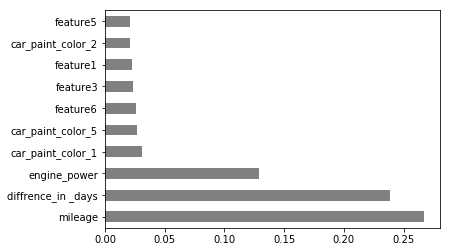

Index(['mileage', 'diffrence_in _days', 'engine_power', 'car_paint_color_1',
       'car_paint_color_5', 'feature6', 'feature3', 'feature1',
       'car_paint_color_2', 'feature5'],
      dtype='object')


In [ ]:
#STEP-3 : exploratory data analysis 
#we need to analyze the data how the dependent variable depends on the independent variable
#so,here we need to extract the best features from given features
# this done in 3 steps
# step 3.1 -:feature imporatance


model = ExtraTreesClassifier()
model.fit(x,y)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index = x.columns)

#selecting top 10 best features
feat_importances.nlargest(10).plot(kind = 'barh',color=['gray'])
plt.show()
print(feat_importances.nlargest(10).index)



In [ ]:
#in the above graph that shows top 10 features
#we need to select that features and delete all the remaining colums
feature_selected_x = data_set_preprocessed[feat_importances.nlargest(10).index]
#now we have top 10 features again we find best features from these 10 features
#step 3.2 -: backward elimination
reg_ols = sm.OLS(endog = y,exog = feature_selected_x).fit()
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              car_price   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              2666.
Date:                Sun, 04 Aug 2019   Prob (F-statistic):                        0.00
Time:                        07:19:04   Log-Likelihood:                         -34414.
No. Observations:                3390   AIC:                                  6.885e+04
Df Residuals:                    3380   BIC:                                  6.891e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
mileage               -0.0254      0.002    -13.050      0.000      -0.029      -0.022
diffrence_in _days    -2.1537      0.130    -16.585      0.000      -2.408      -1.899
engine_power         166.7087      2.205     75.607      0.000     162.386     171.032
car_paint_color_1    980.5638    266.398      3.681      0.000     458.247    1502.881
car_paint_color_5   1087.6516    293.455      3.706      0.000     512.285    1663.018
feature6             663.3736    263.062      2.522      0.012     147.597    1179.150
feature3             889.6199    284.046      3.132      0.002     332.700    1446.540
feature1            1851.3706    234.880      7.882      0.000    1390.850    2311.892
car_paint_color_2    431.4619    334.237      1.291      0.197    -223.865    1086.788
feature5            -109.7221    240.651     -0.456      0.648    -581.559     362.115
==============================================================================
Omnibus:                     4712.053   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4464792.165
Skew:                           7.465   Prob(JB):                         0.00
Kurtosis:                     180.162   Cond. No.                     5.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#from above data now we need to eliminate column which have greater p>|t| 
#from above result feature5 have grater p>|t| value this value may be changes when we reexecute the program we need to chnage column name according to above result
# we need eliminate that column and again fit it OLS 

feature_selected_x = feature_selected_x.drop(columns = ['feature5'])
reg_ols = sm.OLS(endog = y,exog = feature_selected_x).fit()
reg_ols.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              car_price   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              2962.
Date:                Sun, 04 Aug 2019   Prob (F-statistic):                        0.00
Time:                        07:19:28   Log-Likelihood:                         -34415.
No. Observations:                3390   AIC:                                  6.885e+04
Df Residuals:                    3381   BIC:                                  6.890e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
mileage               -0.0255      0.002    -13.181      0.000      -0.029      -0.022
diffrence_in _days    -2.1454      0.129    -16.686      0.000      -2.398      -1.893
engine_power         166.4334      2.120     78.490      0.000     162.276     170.591
car_paint_color_1    976.2637    266.200      3.667      0.000     454.335    1498.192
car_paint_color_5   1088.6554    293.412      3.710      0.000     513.372    1663.939
feature6             640.7270    258.300      2.481      0.013     134.288    1147.166
feature3             879.3720    283.123      3.106      0.002     324.263    1434.481
feature1            1832.5394    231.193      7.926      0.000    1379.247    2285.831
car_paint_color_2    439.4062    333.743      1.317      0.188    -214.953    1093.765
==============================================================================
Omnibus:                     4712.822   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4465619.148
Skew:                           7.467   Prob(JB):                         0.00
Kurtosis:                     180.178   Cond. No.                     5.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#from above result car_paint_color_2 have grater p>|t| value
#again we need eliminate that column and again fit it OLS 

feature_selected_x = feature_selected_x.drop(columns = ['car_paint_color_2'])
reg_ols = sm.OLS(endog = y,exog = feature_selected_x).fit()
reg_ols.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              car_price   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              3332.
Date:                Sun, 04 Aug 2019   Prob (F-statistic):                        0.00
Time:                        07:20:01   Log-Likelihood:                         -34415.
No. Observations:                3390   AIC:                                  6.885e+04
Df Residuals:                    3382   BIC:                                  6.890e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
mileage               -0.0253      0.002    -13.118      0.000      -0.029      -0.022
diffrence_in _days    -2.1295      0.128    -16.634      0.000      -2.381      -1.879
engine_power         167.0580      2.067     80.825      0.000     163.005     171.111
car_paint_color_1    833.5459    243.156      3.428      0.001     356.799    1310.293
car_paint_color_5    945.8757    272.665      3.469      0.001     411.270    1480.481
feature6             639.1910    258.325      2.474      0.013     132.702    1145.680
feature3             867.5169    283.010      3.065      0.002     312.629    1422.405
feature1            1840.7492    231.134      7.964      0.000    1387.573    2293.925
==============================================================================
Omnibus:                     4719.009   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4511275.278
Skew:                           7.484   Prob(JB):                         0.00
Kurtosis:                     181.085   Cond. No.                     4.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#from above result feature6 have grater p>|t| value
#we need eliminate that column and again fit it OLS 

feature_selected_x = feature_selected_x.drop(columns = ['feature6'])
reg_ols = sm.OLS(endog = y,exog = feature_selected_x).fit()
reg_ols.summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              car_price   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              3801.
Date:                Sun, 04 Aug 2019   Prob (F-statistic):                        0.00
Time:                        07:20:28   Log-Likelihood:                         -34419.
No. Observations:                3390   AIC:                                  6.885e+04
Df Residuals:                    3383   BIC:                                  6.889e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
mileage               -0.0253      0.002    -13.115      0.000      -0.029      -0.022
diffrence_in _days    -2.1451      0.128    -16.763      0.000      -2.396      -1.894
engine_power         168.3648      2.000     84.191      0.000     164.444     172.286
car_paint_color_1    828.7793    243.332      3.406      0.001     351.686    1305.872
car_paint_color_5    917.4615    272.629      3.365      0.001     382.926    1451.997
feature3             913.7358    282.607      3.233      0.001     359.639    1467.833
feature1            1875.3566    230.885      8.122      0.000    1422.669    2328.045
==============================================================================
Omnibus:                     4700.212   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4434458.038
Skew:                           7.427   Prob(JB):                         0.00
Kurtosis:                     179.561   Cond. No.                     4.45e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#from above result car_paint_color_1,car_paint_color_5,feature3 have grater p>|t| value
# we need eliminate that column and again fit it OLS 

feature_selected_x = feature_selected_x.drop(columns = ['car_paint_color_1','car_paint_color_5','feature3'])
reg_ols = sm.OLS(endog = y,exog = feature_selected_x).fit()
reg_ols.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              car_price   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                              6601.
Date:                Sun, 04 Aug 2019   Prob (F-statistic):                        0.00
Time:                        07:21:39   Log-Likelihood:                         -34431.
No. Observations:                3390   AIC:                                  6.887e+04
Df Residuals:                    3386   BIC:                                  6.890e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
mileage               -0.0248      0.002    -12.937      0.000      -0.029      -0.021
diffrence_in _days    -2.0969      0.128    -16.424      0.000      -2.347      -1.847
engine_power         171.6541      1.894     90.625      0.000     167.940     175.368
feature1            2022.4307    228.502      8.851      0.000    1574.415    2470.446
==============================================================================
Omnibus:                     4681.347   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4373517.091
Skew:                           7.369   Prob(JB):                         0.00
Kurtosis:                     178.345   Cond. No.                     3.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

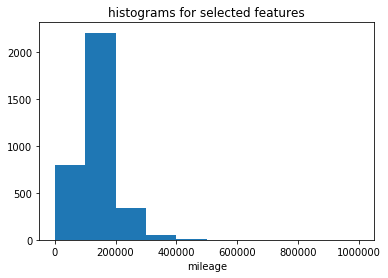

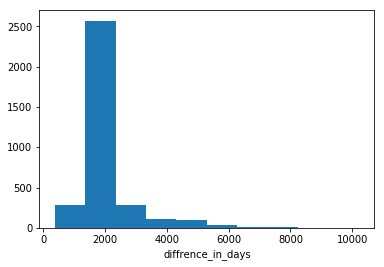

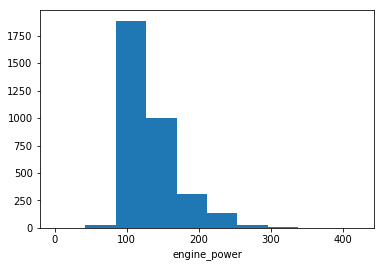

In [ ]:
#now this  5 features plays a major role in finding independent variable
#mileage	diffrence_in _days	engine_power	feature1   feature2
#checking these feature importances through histogram

plt.hist(data_set_preprocessed['mileage'])
plt.xlabel('mileage')
plt.title('histograms for selected features')
plt.show()

plt.hist(data_set_preprocessed['diffrence_in _days'])
plt.xlabel('diffrence_in_days')
plt.show()


plt.hist(data_set_preprocessed['engine_power'])
plt.xlabel('engine_power')
plt.show()




In [ ]:
#now this  5 features plays a major role in finding independent variable
#mileage	diffrence_in _days	engine_power	feature1   feature8
#Step -: 4 Data modeling


#applying Random forest regression algorithm

regressor  = RandomForestRegressor(n_estimators=5000,random_state = 0)
regressor.fit( feature_selected_x , y)



In [ ]:
#step-5 -: model evaluation with r2_score
y_predictions = regressor.predict(feature_selected_x)

r2_score(y,y_predictions)


0.9528822367043059

In [ ]:
#finally we are done with good r2_score now we goto the test_set prdictions


#stpe-6 your test set prediction

#before entering your test_set pass your test_set through this function because we need to do some pre-procesing

def prerpocess(test_set):
  
  data_set_preprocessed = test_set
  data_set_preprocessed = data_set_preprocessed.drop(columns=['car_company'])
  
  #model_id column also doesn't show any impact on the dependent variable
  #so we need to eliminate car_company colun from our dataset
  
  data_set_preprocessed = data_set_preprocessed.drop(columns=['model_ID'])
  
  #now we need to convert boolean datatype columns into catrgeorical data-types(means convertong TRUE or FALSE to 0 or 1)
  #totally we have 8 columns of boolean data from column feature1 to feature8
  
  label_encoder = LabelEncoder()
  data_set_preprocessed['feature1'] = label_encoder.fit_transform(data_set_preprocessed['feature1'] )
  data_set_preprocessed['feature2'] = label_encoder.fit_transform(data_set_preprocessed['feature2'] )
  data_set_preprocessed['feature3'] = label_encoder.fit_transform(data_set_preprocessed['feature3'] )
  data_set_preprocessed['feature4'] = label_encoder.fit_transform(data_set_preprocessed['feature4'] )
  data_set_preprocessed['feature5'] = label_encoder.fit_transform(data_set_preprocessed['feature5'] )
  data_set_preprocessed['feature6'] = label_encoder.fit_transform(data_set_preprocessed['feature6'] )
  data_set_preprocessed['feature7'] = label_encoder.fit_transform(data_set_preprocessed['feature7'] )
  data_set_preprocessed['feature8'] = label_encoder.fit_transform(data_set_preprocessed['feature8'] )
  
  
  #now we have a two date columns registrartion_date and sold_date we need to time gap between these two dates
  #these time gap plays a major role in detemining the dependent variable
  
  #extracting month 
  data_set_preprocessed["Month"] = pd.to_datetime(data_set_preprocessed["registration_date"]).dt.month
  
  data_set_preprocessed["Month_2"] = pd.to_datetime(data_set_preprocessed["sold_date"]).dt.month
  
  #extracting year
  data_set_preprocessed["year"] = pd.to_datetime(data_set_preprocessed["registration_date"]).dt.year
  
  data_set_preprocessed['year_2'] = pd.to_datetime(data_set_preprocessed["sold_date"]).dt.year
  
  #extracting day
  for i in range(len(data_set_preprocessed)): 
    data_set_preprocessed.loc[i,'day'] = int(data_set_preprocessed.loc[i,'registration_date'].split('-')[1])
  
  for i in range(len(data_set_preprocessed)): 
     data_set_preprocessed.loc[i,'day_2'] = int(data_set_preprocessed.loc[i,'sold_date'].split('-')[1])
  

  values_day = data_set_preprocessed['day'].values
  values_day_2 = data_set_preprocessed['day_2'].values
  
  
  values_year = data_set_preprocessed['year'].values
  values_year_2 = data_set_preprocessed['year_2'].values
  
  data_set_preprocessed['diffrence_in _days'] = (values_year_2 - values_year) * 365 + abs(values_day - values_day_2)
  #here we are not added any month column data because month columns contains same value
  
  data_set_preprocessed['fuel'] = label_encoder.fit_transform(data_set_preprocessed['fuel'] )
  data_set_preprocessed['car_paint_color'] = label_encoder.fit_transform(data_set_preprocessed['car_paint_color'] )
  data_set_preprocessed['car_type'] = label_encoder.fit_transform(data_set_preprocessed['car_type'] )
  #again we need to perform one hot encoding on these coloumns


  data_set_preprocessed  =  pd.get_dummies(data_set_preprocessed,columns = ['fuel'])
  data_set_preprocessed  =  pd.get_dummies(data_set_preprocessed,columns = ['car_paint_color'])
  data_set_preprocessed  =  pd.get_dummies(data_set_preprocessed,columns= ['car_type'])
  
  
  data_set_preprocessed[data_set_preprocessed < 0] = 0
  
  test_set_preprocessed = data_set_preprocessed(columns=['mileage' , 'diffrence_in _days' ,	'engine_power' ,	'feature1' , 'feature8'])
  
  return test_set_preprocessed


#enter yur test set here
test_set_preprocessed = preprocess(#enter youe test_set here)

   
#making predictions in your test set
test_set_predictions = regressor.predict(test_set_preprocessed)
    

#calculating r2score for your test set

r2_score(test_set_preprocessed,test_set_predictions)    

